# **Testy statystyczne**

## Zaimportowanie bibliotek potrzebnych do wykonania testów i wykresów

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestPower

## Przygotowanie danych do pracy z nimi

In [323]:
# Wczytanie danych
df = pd.read_csv("symulacja_banku.csv")

# Konwersja kolumn na liczby
df["Czas_przyjscia"] = df["Czas_przyjscia"].astype(int)
df["Czas_rozpoczecia_obslugi"] = df["Czas_rozpoczecia_obslugi"].astype(int)
df["Czas_zakonczenia_obslugi"] = df["Czas_zakonczenia_obslugi"].astype(int)
df["Czas_oczekiwania"] = df["Czas_oczekiwania"].astype(int)
df["Dzien"] = df["Dzien"].astype(int)
df["Stanowisko"] = df["Stanowisko"].astype(int)

# Dodanie kolumny: czas_obslugi
df["Czas_obslugi"] = df["Czas_zakonczenia_obslugi"] - df["Czas_rozpoczecia_obslugi"]

# Test statystyczny: test t-Studenta dla jednej próby sprawdza, czy średnia z próby różni się od określonej wartości
Hipoteza zerowa: Średni czas oczekiwania wynosi 10 minut <br>
Hipoteza alternatywna: Średni czas oczekiwania jest różny <br>
**t_stat** - średnia z próby znajduje się t odchylenia standardowe od wartości oczekiwanej <br>
**p-wartość** - prawdopodobieństwo otrzymania takiego lub bardziej ekstremalnego wyniku, zakładając, że hipoteza zerowa jest prawdziwa

In [324]:
print("Średni czas oczekiwania:", df["Czas_oczekiwania"].mean())

t_stat, p_val = stats.ttest_1samp(df["Czas_oczekiwania"], popmean=14) 

print(f"Statystyka t: {t_stat:.3f}, p-wartość: {p_val:.5f}") 
if p_val < 0.05:
    print("Odrzucamy hipotezę zerową.")
else:
    print("Brak podstaw do odrzucenia hipotezy zerowej.")


Średni czas oczekiwania: 14.855509355509355
Statystyka t: 1.594, p-wartość: 0.11122
Brak podstaw do odrzucenia hipotezy zerowej.


Obliczenie mocy testu

In [325]:
effect_size = (df["Czas_oczekiwania"].mean() - 13) / df["Czas_oczekiwania"].std()
analysis = TTestPower()
power = analysis.power(effect_size=effect_size, nobs=len(df["Czas_oczekiwania"]), alpha=0.05)
print(f"Moc testu: {power:.4f}")

Moc testu: 0.9324


# Sprawdzenie normalności rozkładu czasu przyjścia przy użyciu testu Shapiro-Wilk

In [326]:
shapiro_test = stats.shapiro(df["Czas_przyjscia"].sample(n=200))
print(f"Shapiro-Wilk p-wartość: {shapiro_test.pvalue:.5f}")


Shapiro-Wilk p-wartość: 0.00014


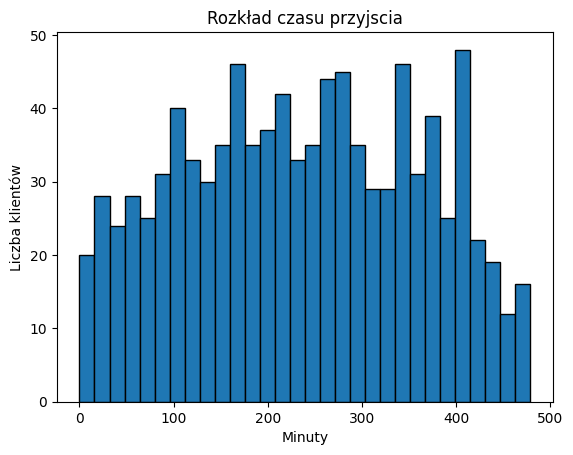

In [327]:
plt.hist(df["Czas_przyjscia"], bins=30, edgecolor='black')
plt.title("Rozkład czasu przyjscia")
plt.xlabel("Minuty")
plt.ylabel("Liczba klientów")
plt.show()

# Testowanie jednorodności rozkładu długości kolejek
Hipoteza zerowa: Długości kolejek w momencie przyjścia mają rozkład jednostajny (każda wartość ma taką samą częstość) <br>
Hipoteza alternatywna: Długości kolejek w momencie przyjścia nie mają rozkładu jednostajnego <br>
Test chi-kwadrat

In [328]:
from scipy.stats import chisquare

# Częstość długości kolejki
dlugosc_kolejki = df["Dlugosc kolejki w momencie przyjscia"]
obserwowane = dlugosc_kolejki.value_counts().sort_index()

spodziewane = [len(dlugosc_kolejki) / len(obserwowane)] * len(obserwowane)

# Test chi-kwadrat
chi2_stat, chi2_p = chisquare(f_obs=obserwowane, f_exp=spodziewane)
print("Test chi-kwadrat:")
print(f"χ² = {chi2_stat:.4f}, p-wartość = {chi2_p:.5f}")
if chi2_p < 0.05:
    print("Odrzucamy hipotezę zerową o jednorodności rozkładu długości kolejek.")
else:
    print("Brak podstaw do odrzucenia hipotezy zerowej o jednorodności rozkładu długości kolejek.")

Test chi-kwadrat:
χ² = 1394.6570, p-wartość = 0.00000
Odrzucamy hipotezę zerową o jednorodności rozkładu długości kolejek.


Wizualizacja długości kolejek

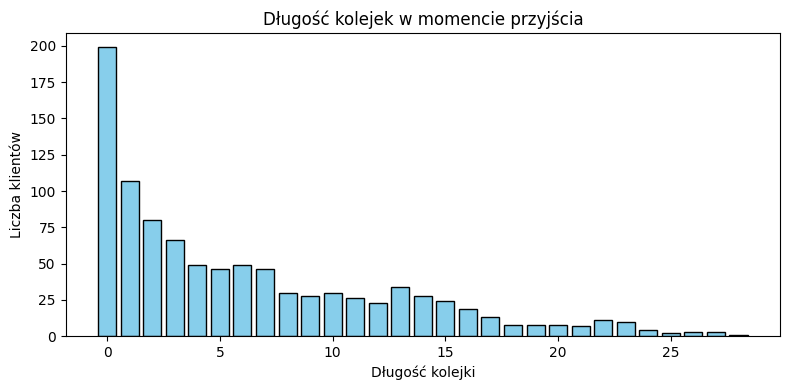

In [329]:
plt.figure(figsize=(8, 4))
plt.bar(obserwowane.index, obserwowane.values, color='skyblue', edgecolor='black')
plt.title("Długość kolejek w momencie przyjścia")
plt.xlabel("Długość kolejki")
plt.ylabel("Liczba klientów")
plt.tight_layout()
plt.show()

## Sprawdzenie testem Shapiro-Wilk, czy czas obsługi dla stanowiska 2 ma rozkład normalny 
Hipoteza zerowa: Czas obsługi dla stanowiska 2 ma rozkład normalny <br>
Hipoteza alternatywna: Czas obsługi dla stanowiska 2 nie ma rozkładu normalnego <br>

In [330]:
shapiro = stats.shapiro(df[df['Stanowisko'] == 2]['Czas_obslugi'])
print("Shapiro-Wilk test dla czasu obsługi:")
print(f"Statistic = {shapiro.statistic:.4f}, p-value = {shapiro.pvalue:.4f}")
if shapiro.pvalue < 0.05:
    print("Odrzucamy hipotezę zerową: Czas obsługi dla stanowiska 2 nie ma rozkładu normalnego.")
else:
    print("Brak podstaw do odrzucenia hipotezy zerowej: Czas obsługi dla stanowiska 2 ma rozkład normalny.")


Shapiro-Wilk test dla czasu obsługi:
Statistic = 0.7223, p-value = 0.0000
Odrzucamy hipotezę zerową: Czas obsługi dla stanowiska 2 nie ma rozkładu normalnego.


Wykres rozkładu czasu obsługi

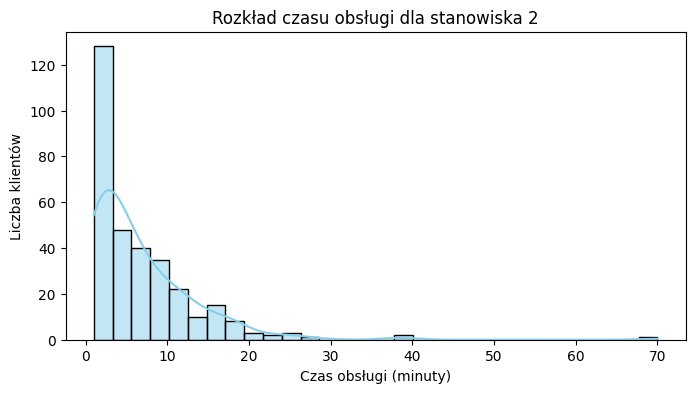

In [331]:

plt.figure(figsize=(8, 4))
sns.histplot(df[df['Stanowisko'] == 2]['Czas_obslugi'], bins=30, kde=True, color='skyblue')
plt.title("Rozkład czasu obsługi dla stanowiska 2")
plt.xlabel("Czas obsługi (minuty)")
plt.ylabel("Liczba klientów")
plt.show()

## Dystrybuanta empiryczna -  funkcja "schodkowa" o skokach w punktach odpowiadających kolejnym wartościom próby
Wykres przedstawiający dystrybuantę empiryczną i normalną dla czasu oczekiwania

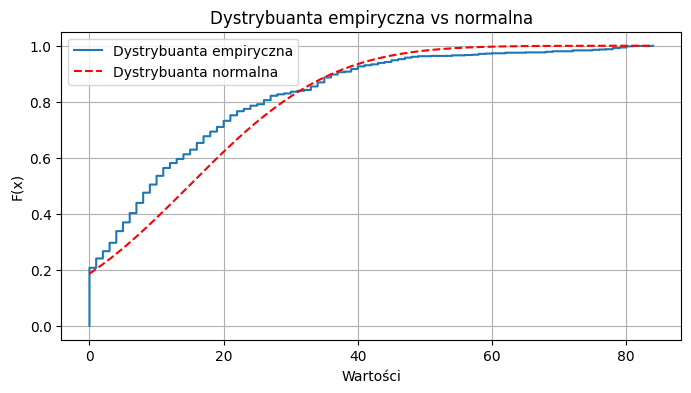

In [332]:
from statsmodels.distributions.empirical_distribution import ECDF
data = df["Czas_oczekiwania"]
ecdf = ECDF(data)
x = np.linspace(min(data), max(data), num=1000)
plt.figure(figsize=(8, 4))
plt.step(ecdf.x, ecdf.y, label='Dystrybuanta empiryczna', where='post')
plt.plot(x, stats.norm.cdf(x, np.mean(data), np.std(data)), 'r--', label='Dystrybuanta normalna')
plt.title("Dystrybuanta empiryczna vs normalna")
plt.xlabel("Wartości")
plt.ylabel("F(x)")
plt.legend()
plt.grid(True)
plt.show()

# Test Kołmogorowa-Smirnowa dla sprawdzenia, czy dane dla czasu oczekiwania pochodzą z rozkładu normalnego

In [333]:
ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
print(f"Test Kołmogorowa-Smirnowa: statystyka={ks_stat:.4f}, p-wartość={ks_p:.5f}")


Test Kołmogorowa-Smirnowa: statystyka=0.1859, p-wartość=0.00000


# Test Andersona-Darlinga dla normalności rozkładu czasu obsługi w 5 dniu

In [342]:
czasy = df[df['Dzien'] == 5]['Czas_obslugi']

result_ad = stats.anderson(czasy, dist='norm')
print("\nTest Andersona–Darlinga:")
print(f"Statystyka A² = {result_ad.statistic:.4f}")
for cv, sig in zip(result_ad.critical_values, result_ad.significance_level):
    if result_ad.statistic > cv:
        print(f"Na poziomie istotności {sig}%: odrzucamy hipotezę o normalności (A² = {result_ad.statistic:.4f} > {cv})")
    else:
        print(f"Na poziomie istotności {sig}%: brak podstaw do odrzucenia hipotezy (A² = {result_ad.statistic:.4f} < {cv})")



Test Andersona–Darlinga:
Statystyka A² = 10.1158
Na poziomie istotności 15.0%: odrzucamy hipotezę o normalności (A² = 10.1158 > 0.565)
Na poziomie istotności 10.0%: odrzucamy hipotezę o normalności (A² = 10.1158 > 0.643)
Na poziomie istotności 5.0%: odrzucamy hipotezę o normalności (A² = 10.1158 > 0.771)
Na poziomie istotności 2.5%: odrzucamy hipotezę o normalności (A² = 10.1158 > 0.9)
Na poziomie istotności 1.0%: odrzucamy hipotezę o normalności (A² = 10.1158 > 1.07)


## Test dla wartości średniej - rozkład dowolny, duża próba
Hipoteza zerowa: Średni czas oczekiwania wynosi 14 minut

In [335]:
data = df["Czas_oczekiwania"].dropna()
m_0 = 14 # czas oczekiwania z H0

n = len(data)
sample_mean = np.mean(data)
sample_std = np.std(data)  # estymator odchylenia standardowego
u = (sample_mean - m_0)/sample_std * np.sqrt(n)  # różnica między średnią próby a wartością oczekiwaną

print(f"Hipoteza zerowa: Średni czas oczekiwania wynosi {m_0} minut")
print(f"Średnia z próby: {sample_mean:.2f}, Odchylenie standardowe z próby: {sample_std:.2f}")
print(f"Test średniej (duża próba, rozkład dowolny):")
print(f"Wartość statystyki testowej: {u:.2f}")
if sample_mean > m_0 and u < 1.96:  # dla poziomu istotności 0.05
    print("Przyjmujemy hipotezę zerową.")
elif sample_mean < m_0 and u > -1.96:
    print("Przyjmujemy hipotezę zerową.")
else:
    print("Odrzucamy hipotezę zerową.")

Hipoteza zerowa: Średni czas oczekiwania wynosi 14 minut
Średnia z próby: 14.86, Odchylenie standardowe z próby: 16.64
Test średniej (duża próba, rozkład dowolny):
Wartość statystyki testowej: 1.60
Przyjmujemy hipotezę zerową.


# Test dla wariancji
Hipoteza zerowa wariancja dla czasu obsługi na stanowisku 2

In [336]:
data = df[df['Stanowisko'] == 2]['Czas_obslugi']
wariancja = np.std(data) **2
wariancja_0 = 50.0  # przykładowa wartość wariancji do testu

u_w = (wariancja-wariancja_0)/wariancja_0 * np.sqrt(n/2)

print(f"\nHipoteza zerowa: Wariancja wynosi {wariancja_0:.2f}")
print(f"Obliczona wariancja z próby: {wariancja:.2f}")
print(f"\nTest wariancji - rozkład dowolny z dużą próbą:")
print(f"Wartość statystyki testowej: {u_w:.2f}")
if wariancja < wariancja_0 and u_w > -2.56 :  # dla poziomu istotności 0.05
    print("Przyjmujemy hipotezę zerową.")
elif wariancja > wariancja_0 and u_w < 2.56:
    print("Przyjmujemy hipotezę zerową.")
else:
    print("Odrzucamy hipotezę zerową.")


Hipoteza zerowa: Wariancja wynosi 50.00
Obliczona wariancja z próby: 48.99

Test wariancji - rozkład dowolny z dużą próbą:
Wartość statystyki testowej: -0.44
Przyjmujemy hipotezę zerową.


# Test dla procentu
Hipoteza zerowa H0 liczba klientów przychodzących do godziny 13 wynosi 50% wobec alternatywy H1 liczba klientów przychodzących do godziny 13 jest większa od 50% 

In [337]:
M = (df["Czas_przyjscia"] <= 240).sum()  # liczba klientów przychodzących do godziny 13
n = len(df)  # całkowita liczba przychodzących klientów

p_0 = 0.50

u_p = (M - n * p_0)/ np.sqrt(n * p_0 * (1 - p_0))

print(f"Liczba klientów do godziny 13: {M}")
print(f"Liczba wszystkich klientów: {n}")
print(f"\nTest dla procentu:")
print(f"Wartość statystyki testowej: {u_p:.2f}")
if u_p > 1.28:
    print("Przyjmujemy hipotezę zerową.")
else:
    print("Odrzucamy hipotezę zerową  na korzyść alternatywy.")

Liczba klientów do godziny 13: 490
Liczba wszystkich klientów: 962

Test dla procentu:
Wartość statystyki testowej: 0.58
Odrzucamy hipotezę zerową  na korzyść alternatywy.


# Test dla dwóch średnich czasu obsługi na stanowisku 2 i 3
Aby wykonać ten test najpierw należy sprawdzić z jakim rodzajem danych mamy do czynienia
Sprawdzenie normalności czasu obsługi na stanowisku 2

In [338]:
shapiro_test_obsluga_2 = stats.shapiro(df[df['Stanowisko'] == 2]['Czas_obslugi'])
print(f"\nShapiro-Wilk test dla czasu obsługi na stanowisku 2:")
print(f"Statystyka = {shapiro_test_obsluga_2.statistic:.4f}, p-wartość = {shapiro_test_obsluga_2.pvalue:.4f}")


Shapiro-Wilk test dla czasu obsługi na stanowisku 2:
Statystyka = 0.7223, p-wartość = 0.0000


Sprawdzenie normalności czasu obsługi na stanowisku 3

In [339]:
shapiro_test_obsluga_3 = stats.shapiro(df[df['Stanowisko'] == 3]['Czas_obslugi'])
print(f"\nShapiro-Wilk test dla czasu obsługi na stanowisku 3:")
print(f"Statystyka = {shapiro_test_obsluga_2.statistic:.4f}, p-wartość = {shapiro_test_obsluga_3.pvalue:.4f}")


Shapiro-Wilk test dla czasu obsługi na stanowisku 3:
Statystyka = 0.7223, p-wartość = 0.0000


Z powyższych testów wynika, że dane nie mają rozkładu normalnego, więc należy wykorzystać model dla rozkładów dowolnych z dużymi próbami (dane zawierają więcej niż 100 pozycji) <br>
Hipoteza zerowa: Średni czas obsługi na stanowisku 2 i 3 jest taki sam <br>
Hipoteza alternatywna: Średni czas obsługi na stanowisku 2 jest krótszy niż na stanowisku 3

In [340]:
srednia_3 = np.mean(df[df['Stanowisko'] == 3]['Czas_obslugi'])
srednia_2 = np.mean(df[df['Stanowisko'] == 2]['Czas_obslugi'])

wariancja_3 = np.var(df[df['Stanowisko'] == 3]['Czas_obslugi'], ddof=1)
wariancja_2 = np.var(df[df['Stanowisko'] == 2]['Czas_obslugi'], ddof=1)

n_3 = len(df[df['Stanowisko'] == 3]['Czas_obslugi'])
n_2 = len(df[df['Stanowisko'] == 2]['Czas_obslugi'])

u_ws = (srednia_3 - srednia_2) / np.sqrt((wariancja_3/n_3) + (wariancja_2/n_2))

print(f"\nTest dla dwóch średnich (rozkłady dowolne, duże próby):")
print(f"Średni czas obsługi na stanowisku 2: {srednia_2:.2f}, Średni czas obsługi na stanowisku 3: {srednia_3:.2f}")
print(f"Wartość statystyki testowej: {u_ws:.2f}")
print("Zbiór krytyczny: (1.64, ∞)")
if u_ws < 1.64:
    print("Przyjmujemy hipotezę zerową.")
else:
    print("Odrzucamy hipotezę zerową na korzyść alternatywy, że średni czas obsługi na stanowisku 2 jest krótszy niż na stanowisku 3.")


Test dla dwóch średnich (rozkłady dowolne, duże próby):
Średni czas obsługi na stanowisku 2: 6.75, Średni czas obsługi na stanowisku 3: 7.82
Wartość statystyki testowej: 1.68
Zbiór krytyczny: (1.64, ∞)
Odrzucamy hipotezę zerową na korzyść alternatywy, że średni czas obsługi na stanowisku 2 jest krótszy niż na stanowisku 3.


# Test Kruskala-Wallisa
Służy do weryfikacji hipotezy zerowej o identyczności rozkładów pewnej cechy X typu ciągłego w k>=3 różnych populacjach (równości median tych rozkładów) <br>
Hipoteza zerowa: średni czas obsługi na trzech stanowiskach nie zawiera istotnych różnic między stanowiskami

In [341]:
from scipy.stats import kruskal

# Przykładowe dane z 3 grup
grupa1 = np.mean(df[df['Stanowisko'] == 1]['Czas_obslugi'])
grupa2 = np.mean(df[df['Stanowisko'] == 2]['Czas_obslugi'])
grupa3 = np.mean(df[df['Stanowisko'] == 3]['Czas_obslugi'])

statystyka, p_wartosc = kruskal(grupa1, grupa2, grupa3)

print("\nTest Kruskala-Wallisa:")
print(f"Statystyka H: {statystyka}")
print(f"Wartość p: {p_wartosc}")

# Interpretacja wyniku
if p_wartosc < 0.05:
    print("Odrzucamy H0: Istnieją istotne różnice między grupami.")
else:
    print("Brak podstaw do odrzucenia H0: Brak istotnych różnic między grupami.")



Test Kruskala-Wallisa:
Statystyka H: 2.0
Wartość p: 0.36787944117144245
Brak podstaw do odrzucenia H0: Brak istotnych różnic między grupami.
